# Bayesian linear regression

The linear regression is a simple model which models the outputs based on a linear combination of the features:

In [ ]:
%%latex
Find $w_{opt} \in \mathbb{R}$ such that: $$w_{opt} = argmin_{w} \sum_{i} \Vert w^{T} x_{i} - y_{i}\Vert^{2}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from scipy.stats import multivariate_normal
mpl.rcParams['figure.figsize'] = 16, 8

In [3]:
# Generate toy dataset
x = np.linspace(2, 8, 10)
y = (x-4)**3 + np.random.normal(0, 1, size=len(x))
x_test = np.arange(11)

## Frequentist approach

In [4]:
%%latex
Under the frequentist approach, the solution is straightforward:
$$w = (X^{T}X)^{-1} X y$$

<IPython.core.display.Latex object>

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

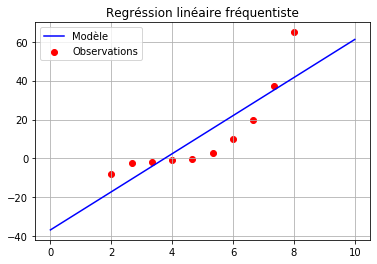

In [6]:
# plot
predictions = lin_reg.coef_ * x_test + lin_reg.intercept_
plt.scatter(x, y, color='r', label="Observations")
plt.plot(x_test, predictions, color='b', label="Modèle")
plt.grid()
plt.title("Regréssion linéaire fréquentiste")
plt.legend()

## Bayesian approach

In [7]:
%%latex
Under the bayesian approach, one should define a prior on $w$ and perform a bayesian update for each observation. The regularisation parameter here is tricky to compute as it involves integrating on all possible values of $w$

<IPython.core.display.Latex object>

In [8]:
from sklearn.linear_model import BayesianRidge
bayes_reg = BayesianRidge()
bayes_reg.fit(x.reshape(-1, 1), y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [9]:
pred_mean, pred_std = bayes_reg.predict(x_test.reshape(-1, 1), return_std=True)

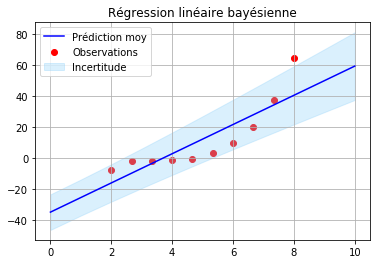

In [10]:
# plot
plt.scatter(x, y, color='r', label="Observations")
plt.plot(x_test, pred_mean, color="b", label="Prédiction moy")
plt.fill_between(x_test, pred_mean-pred_std, pred_mean+pred_std, color=(135/255,206/255,250/255), alpha=0.3, label="Incertitude")
plt.grid()
plt.title("Régression linéaire bayésienne")
plt.legend()